In [7]:
# SENTIMENT ANALYSIS: Amazon Customer Reviews

# The aim is to classify reviews into categories: positive, negative, or neutral. This can provide
# valuable insights for businesses to understand customer sentiment and improve their products or services.


# Load the Amazon Customer Review Dataset

import pandas as pd
df = pd.read_csv("/content/amazondata.csv", low_memory=False)

In [ ]:
# View the dataset
df


,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,Review Body,Review Year,Review Headline,Star Rating
0,0,1,0,NaN,4.0,14.0,26009102,You will love this book. It is a hard long re...,03/17/2005 0:00,Best Book Ever,5.0
1,NaN,1,NaN,NaN,NaN,NaN,7491727,This is the UK edition of Dr. Omit's book. Dr....,NaN,researchers from John Hopkins School of Medici...,NaN
2,0,1,0,NaN,2.0,2.0,002782683X,This is a fun and entertaining book about lear...,06/25/2012 0:00,Michelle,5.0
3,0,1,0,NaN,0.0,0.0,60187271,"Started a big slow, but once into it the autho...",06/09/2013 0:00,Loved the book,5.0
4,0,1,0,NaN,14.0,20.0,60392452,Received this book as a Christmas present. I h...,08/05/2003 0:00,Challenges your assumptions,4.0
...,...,...,...,...,...,...,...,...,...,...,...
128840,0,1,0,NaN,4.0,6.0,60529148,John Stossel explains within these pages how h...,05/19/2004 0:00,Heroic,4.0
128841,NaN,1,NaN,NaN,NaN,NaN,60579412,When Bill Clinton said that we were all cold w...,NaN,the record needed to be set straight. Mona Ch...,NaN
128842,NaN,1,NaN,NaN,NaN,NaN,60184973,"During her reign, Queen Mary foiled several pl...",NaN,Queen of Scots -- but then,NaN
128843,0,1,0,NaN,1.0,1.0,7444117,I just don't understand how this was supposed ...,03/26/2014 0:00,So upsetting,2.0


In [8]:
# Number of Rows and Columns:

df.shape

(128845, 11)

In [9]:
# column datatypes

df.dtypes

Helpful Votes (bin)     object
Number of Records       object
Star Rating (bin)       object
Customer Id            float64
Helpful Votes          float64
Overall Votes          float64
Product Id              object
Review Body             object
Review Year             object
Review Headline         object
Star Rating            float64
dtype: object

In [10]:
# Missing values

df.isnull().sum()

Helpful Votes (bin)    13898
Number of Records          2
Star Rating (bin)      12534
Customer Id            68865
Helpful Votes          13902
Overall Votes          12724
Product Id                 5
Review Body               11
Review Year            13912
Review Headline           14
Star Rating            12540
dtype: int64

DATA PREPROCESSING:

In [11]:
# The key tasks in this stage will be:

# Handling Missing Values: Removing or imputing missing values in crucial columns like 'Review Body' and 'Star Rating'.

# Type Conversion: Converting the data types of columns, if necessary.

# Text Cleaning: Removing special characters, converting all text to lowercase, etc., in the 'Review Body' column.

In [12]:
# We have:

# 11 missing values in the 'Review Body' column
# 12,540 missing values in the 'Star Rating' column

# Handling Missing Values:
#'Review Body': Given that there are only 11 missing values, it's reasonable to simply remove these
# rows from the dataset. The 'Review Body' is crucial for our text-based sentiment analysis.

# 'Star Rating': We have a larger number of missing values here. Since we're planning to use 'Star Rating'
# as labels for training our sentiment analysis model, rows with missing 'Star Rating' won't be useful.
# We should consider removing these as well.

In [13]:
# Remove rows with missing values in the key columns
df_clean = df.dropna(subset=['Review Body', 'Star Rating']).copy()

# Check the new dimensions of the DataFrame and verify the missing values are removed
num_rows_clean, num_cols_clean = df_clean.shape
missing_review_body_clean = df_clean['Review Body'].isnull().sum()
missing_star_rating_clean = df_clean['Star Rating'].isnull().sum()

print(f"Number of rows after cleaning: {num_rows_clean}")
print(f"Number of columns: {num_cols_clean}")
print(f"Missing values in 'Review Body': {missing_review_body_clean}")
print(f"Missing values in 'Star Rating': {missing_star_rating_clean}")


Number of rows after cleaning: 116299
Number of columns: 11
Missing values in 'Review Body': 0
Missing values in 'Star Rating': 0


In [14]:
# We'll remove special characters and convert all text to lowercase.

# The expression re.sub(r'[^\w\s]', '', text) effectively removes all special characters
# from the input text,leaving only alphanumeric characters and spaces.


import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert text to lowercase
    return text

# Apply the function to the 'Review Body' column
df_clean['Cleaned_Review_Body'] = df_clean['Review Body'].apply(clean_text)

# Check the first few rows to see the cleaned text
print(df_clean[['Review Body', 'Cleaned_Review_Body']].head())


                                         Review Body  \
0  You will love this book.  It is a hard long re...   
2  This is a fun and entertaining book about lear...   
3  Started a big slow, but once into it the autho...   
4  Received this book as a Christmas present. I h...   
6  Ugly Impostor, discernible face, self esteem r...   

                                 Cleaned_Review_Body  
0  you will love this book  it is a hard long rea...  
2  this is a fun and entertaining book about lear...  
3  started a big slow but once into it the author...  
4  received this book as a christmas present i ha...  
6  ugly impostor discernible face self esteem rel...  


In [15]:
# Check unique values in 'Star Rating'
unique_star_ratings = df_clean['Star Rating'].unique()
print(f"Unique values in 'Star Rating': {sorted(unique_star_ratings)}")


Unique values in 'Star Rating': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 44.0, 47.0, 49.0, 52.0, 53.0, 54.0, 57.0, 58.0, 62.0, 63.0, 64.0, 68.0, 69.0, 73.0, 74.0, 101.0, 102.0, 112.0, 119.0, 125.0, 131.0, 152.0, 159.0, 171.0, 177.0, 190.0, 235.0, 2008.0]


In [16]:
# remove rows which have star rating that are not between 1-5. These ratings are likely erroneous.
df_filtered = df_clean[df_clean['Star Rating'].between(1, 5)]

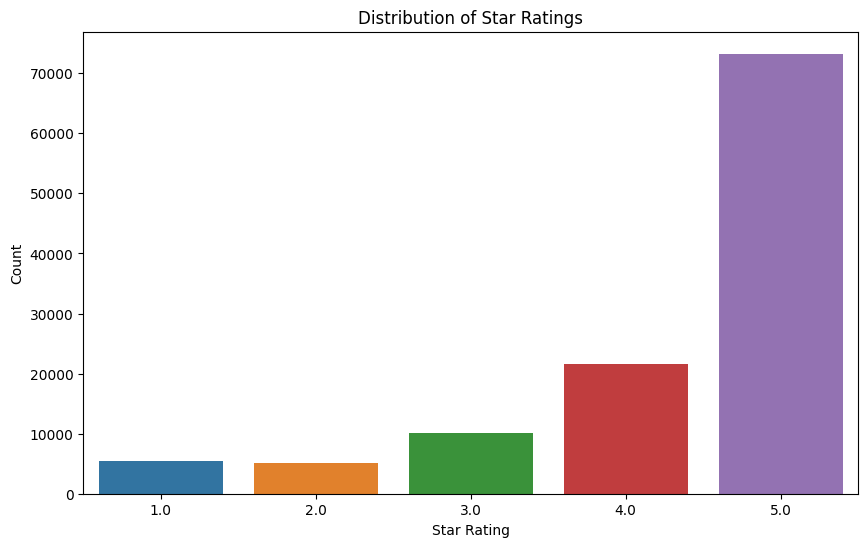

(115552, 12)

In [17]:
# plot the distribution of 'Star Rating'

import matplotlib.pyplot as plt
import seaborn as sns

new_shape = df_filtered.shape


plt.figure(figsize=(10, 6))
sns.countplot(x='Star Rating', data=df_filtered)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

new_shape

FEATURE ENGINEERING

In [ ]:
# In this stage, we'll convert the text data from the 'Review Body' column into a numerical format
# that can be fed into machine learning algorithms.

# For this project, let's start with the TF-IDF approach, which is a commonly used technique that takes into
# account not just the occurrence of words in a single document (or review, in our case) but in the entire
# corpus of documents.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent words to save memory and processing time

# Fit and transform the 'Cleaned_Review_Body' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['Cleaned_Review_Body'])

# Check the shape of the resulting TF-IDF matrix
tfidf_shape = tfidf_matrix.shape
tfidf_shape

# The shape of the TF-IDF matrix indicates that we have successfully transformed 115,552 reviews into numerical
# vectors, each containing the TF-IDF scores for up to 5,000 unique words. This matrix will serve as the input
# for our machine learning model.

(115552, 5000)

In [19]:
# Create labels based on 'Star Rating'
def create_label(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create a new 'Label' column
df_filtered['Label'] = df_filtered['Star Rating'].apply(create_label)

# Check the distribution of the labels
label_distribution = df_filtered['Label'].value_counts()
label_distribution

<ipython-input-19-8b57f8d51833>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Label'] = df_filtered['Star Rating'].apply(create_label)


Positive    94898
Negative    10598
Neutral     10056
Name: Label, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

# Split the TF-IDF matrix and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_filtered['Label'], test_size=0.2, random_state=42)

# Check the shape of the resulting objects
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((92441, 5000), (23111, 5000), (92441,), (23111,))

In [21]:
# MODELING- Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.857686815801999
Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.45      0.54      2105
     Neutral       0.47      0.20      0.28      2097
    Positive       0.89      0.98      0.93     18909

    accuracy                           0.86     23111
   macro avg       0.68      0.54      0.58     23111
weighted avg       0.83      0.86      0.84     23111



In [23]:
# Model seems biased towards predicting positive labels
# Lets address this using resampling:

from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the distribution of the resampled labels
new_label_distribution = pd.Series(y_train_resampled).value_counts()

# Train the model on the resampled data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("New Label Distribution:")
print(new_label_distribution)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


New Label Distribution:
Positive    75989
Negative    75989
Neutral     75989
Name: Label, dtype: int64
Accuracy: 0.7585565315217861
Classification Report:
              precision    recall  f1-score   support

    Negative       0.42      0.63      0.51      2105
     Neutral       0.26      0.53      0.35      2097
    Positive       0.96      0.80      0.87     18909

    accuracy                           0.76     23111
   macro avg       0.55      0.65      0.58     23111
weighted avg       0.85      0.76      0.79     23111



In [ ]:
# Before Resampling: The model had high accuracy but was biased towards the "Positive" class.
# It was not very good at identifying "Negative" and "Neutral" reviews.

# After Resampling: The overall accuracy went down, but the model became less biased.
# It got better at identifying "Negative" and "Neutral" reviews, as indicated by the increase in
# Recall and F1-Score for these classes.

# In summary, the resampled model is more balanced and fair across all classes, even though its
# overall accuracy is lower.



In [24]:
# Lets test the model with a negative review just for fun

from sklearn.feature_extraction.text import TfidfVectorizer

# Your new review
new_review = "This product is not good !"

# Step 1: Text Cleaning
cleaned_new_review = clean_text(new_review)

# Step 2: TF-IDF Transformation
# Note: We're using the same 'tfidf_vectorizer' that was used for the training data

new_review_tfidf = tfidf_vectorizer.transform([cleaned_new_review])

# Step 3: Model Prediction
# Note: Use the 'logreg' model that you've already trained
new_review_prediction = logreg.predict(new_review_tfidf)

print(f"The predicted sentiment for the review is: {new_review_prediction[0]}")


The predicted sentiment for the review is: Negative


Hyperparamater Tuning (Logistic Regression)

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10]}

# Initialize the GridSearchCV object with the Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_macro')

# Fit the model on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# # Train a new model with the best hyperparameters
# best_model = LogisticRegression(max_iter=2000, C=best_params['C'], penalty=best_params['penalty'],solver='sag')
# best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best = grid_search.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Hyperparameters: {accuracy_best}")
print("Classification Report with Best Hyperparameters:")
print(classification_rep_best)



Best Hyperparameters: {'C': 10}
Accuracy with Best Hyperparameters: 0.7501622603954826
Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

    Negative       0.40      0.61      0.48      2105
     Neutral       0.25      0.51      0.34      2097
    Positive       0.96      0.79      0.87     18909

    accuracy                           0.75     23111
   macro avg       0.54      0.64      0.56     23111
weighted avg       0.84      0.75      0.78     23111



In [ ]:
# Interpreting the Results
# Accuracy: The accuracy with the best hyperparameters is about 75 which is quite similar to what we had before tuning.

# Precision, Recall, F1-Score: The recall and F1-scores for 'Negative' and 'Neutral' reviews remain improved
# compared to the initial model. This means the model is still doing a better job at identifying these harder-to-detect 
# classes.

# This limited hyperparameter tuning did not drastically change the performance but did help us identify the best
# regularization strength C for our Logistic Regression model. Sometimes the gains from hyperparameter tuning are 
# marginal, but in some cases, they can be significant.